* Dates:
    * Older moves might not be torrented
    * Month: Blockbusters are released in May and December, No good movies released January - April, Kids are on summer cvaction during summer months.
* Production Budget: 
    * Might be outliers. Take log if outliers, Remove outliers, Create new feature that is binning production budget
* Rating: Is there a relationship with Number of torrents, look at mean, median torrents per rating. Maybe group ratings together for example G, PG, PG-13 in one group R in another
* Genre as a feature. Maybe keep a subset maybe create new ratings by combing other ratings

In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='bbiggs', api_key='jrgs2lfv3u')
import seaborn as sns

# Read in TRAIN data set and select pertinent columns

In [2]:
df = pd.read_csv('data/train_data.csv', encoding='latin-1')
print(len(df))
df.head()

1322


,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Siege,70000000.0,1998-11-06,1998.0,11.0,R,116,"Action, Thriller",Edward Zwick,"Denzel Washington, Annette Bening, Bruce Willi...",113.0
1,Boomerang,42000000.0,1992-07-01,1992.0,7.0,R,117,"Comedy, Drama, Romance",Reginald Hudlin,"Eddie Murphy, Robin Givens, Halle Berry, David...",30.0
2,Stepmom,50000000.0,1998-12-25,1998.0,12.0,PG-13,124,"Comedy, Drama",Chris Columbus,"Julia Roberts, Susan Sarandon, Ed Harris, Jena...",36.0
3,Moonraker,31000000.0,1979-06-29,1979.0,6.0,PG,126,"Action, Adventure, Sci-Fi",Lewis Gilbert,"Roger Moore, Lois Chiles, Michael Lonsdale, Ri...",130.0
4,Intolerance,385907.0,1916-09-05,1916.0,9.0,NOT RATED,197,"Drama, History, War",D.W. Griffith,"Lillian Gish, Mae Marsh, Robert Harron, F.A. T...",37.0


# Convert dates to datetime objects

In [3]:
df['Released'] = pd.to_datetime(df['Released'])
df['Year'] = pd.DatetimeIndex(df['Released']).year
df['Month'] = pd.DatetimeIndex(df['Released']).month
df.head()

,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Siege,70000000.0,1998-11-06,1998,11,R,116,"Action, Thriller",Edward Zwick,"Denzel Washington, Annette Bening, Bruce Willi...",113.0
1,Boomerang,42000000.0,1992-07-01,1992,7,R,117,"Comedy, Drama, Romance",Reginald Hudlin,"Eddie Murphy, Robin Givens, Halle Berry, David...",30.0
2,Stepmom,50000000.0,1998-12-25,1998,12,PG-13,124,"Comedy, Drama",Chris Columbus,"Julia Roberts, Susan Sarandon, Ed Harris, Jena...",36.0
3,Moonraker,31000000.0,1979-06-29,1979,6,PG,126,"Action, Adventure, Sci-Fi",Lewis Gilbert,"Roger Moore, Lois Chiles, Michael Lonsdale, Ri...",130.0
4,Intolerance,385907.0,1916-09-05,1916,9,NOT RATED,197,"Drama, History, War",D.W. Griffith,"Lillian Gish, Mae Marsh, Robert Harron, F.A. T...",37.0


# Inspect years

In [4]:
df['Year'].describe().astype(int)

count    1322
mean     2003
std        10
min      1916
25%      1999
50%      2005
75%      2011
max      2016
Name: Year, dtype: int64

In [5]:
# dictionary - year counts
yr_dict = df['Year'].value_counts().to_dict()

import operator
yr_lst = sorted(yr_dict.items(), key=operator.itemgetter(0)) # sort by year
yr_lst = yr_lst[::-1]
#print(yr_lst)

In [63]:
fig16 = plt.figure()

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

sns.set_palette('husl')
matplotlib.rc("figure", figsize=(8, 4))

plt.ylabel('Kernel Density Estimate')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')

sns.distplot(bar_year, color="b")
py.iplot_mpl(fig16, strip_style = True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



# df => df_yr 

In [7]:
# cut off at year 
before = len(df)
yr_cut_bot = 1998
yr_cut_top = 2015
mask = (df['Year'] >= yr_cut_bot) & (df['Year'] < yr_cut_top)
df_yr = df.loc[mask]
df_yr.sort_values('Year').head()
after = len(df_yr)

print('{0} entries lost ({1}%) due to date cutoff between {2} and {3}'.format(before-after, 
                                                round((before/after)/before *100, 2), yr_cut_bot, yr_cut_top))

366 entries lost (0.1%) due to date cutoff between 1998 and 2015


In [70]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

df_a = df_yr[['Prod_Budget', 'Year', 'Month', 'Runtime', 'Total_Torrents']]

In [75]:
fig = FF.create_scatterplotmatrix(df_a, diag='box', index='Prod_Budget',
                                  colormap='Portland', colormap_type='seq',
                                  endpts=[-1, 0, 1],
                                  height=800, width=800, size=12,
                                  marker=dict(symbol=25))
py.iplot(fig, filename = 'Partition Numeric Data into Intervals')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]  
[ (2,1) x5,y5 ]    [ (2,2) x6,y6 ]    [ (2,3) x7,y7 ]    [ (2,4) x8,y8 ]  
[ (3,1) x9,y9 ]    [ (3,2) x10,y10 ]  [ (3,3) x11,y11 ]  [ (3,4) x12,y12 ]
[ (4,1) x13,y13 ]  [ (4,2) x14,y14 ]  [ (4,3) x15,y15 ]  [ (4,4) x16,y16 ]



In [69]:
fig = FF.create_scatterplotmatrix(df_a, diag='histogram', index='Prod_Budget',
                                  height=800, width=800)
py.iplot(fig, filename='Histograms along Diagonal Subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]  
[ (2,1) x5,y5 ]    [ (2,2) x6,y6 ]    [ (2,3) x7,y7 ]    [ (2,4) x8,y8 ]  
[ (3,1) x9,y9 ]    [ (3,2) x10,y10 ]  [ (3,3) x11,y11 ]  [ (3,4) x12,y12 ]
[ (4,1) x13,y13 ]  [ (4,2) x14,y14 ]  [ (4,3) x15,y15 ]  [ (4,4) x16,y16 ]



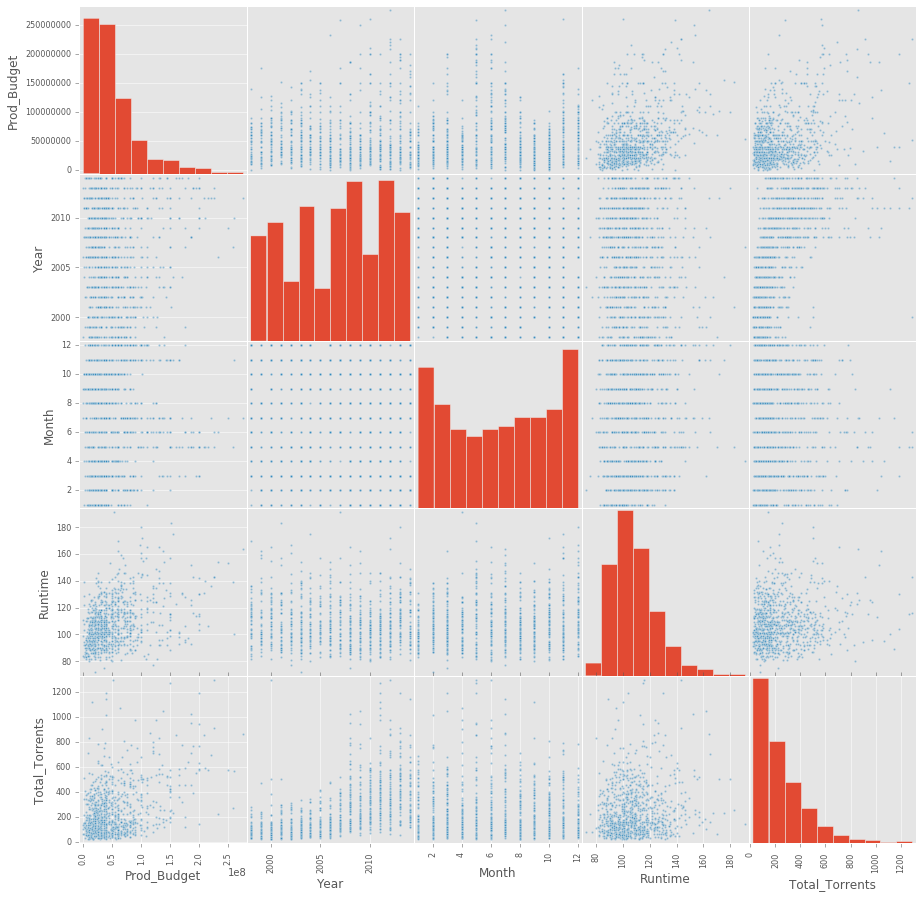

In [8]:
# look at current data set AFTER year cutoff
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_yr)

In [9]:
# unique list of grouped genres as strings
unq_genres = df_yr['Genre'].unique()
unq_genres = unq_genres.tolist()

#print(len(unq_genres))
#print(unq_genres[:10])

# unique list of grouped genres as lists
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)

#print(len(lst_grp_genres))
#print(lst_grp_genres)

In [10]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

#print(len(ind_genre))
#print(ind_genre)

In [11]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df_yr.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)

In [12]:
def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

In [13]:
def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_yr['Genre_Single'] = df_yr.Genre.apply(convert_frequency)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Select only significant values from dataframe
# df_yr => df_sub

In [14]:
# select only genres of significance
genre = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama']
df_sub = df_yr.loc[df_yr['Genre_Single'].isin(genre)]

# select only genres of significance
ratings = ['PG-13', 'PG', 'G', 'R']
df_sub = df_sub.loc[df_sub['Rated'].isin(ratings)]

#df_sub['Runtime'].value_counts()
#df_sub['Genre_Single'].value_counts()
#df_sub['Rated'].value_counts()
df_sub.describe()

,Prod_Budget,Year,Month,Runtime,Total_Torrents
count,8.750000e+02,875.000000,875.00000,875.000000,875.000000
mean,5.462484e+07,2006.445714,6.66400,109.422857,245.982857
std,4.516086e+07,4.781516,3.36138,17.375103,211.634947
min,6.800000e+04,1998.000000,1.00000,72.000000,20.000000
25%,2.450000e+07,2002.000000,4.00000,97.000000,97.500000
50%,4.000000e+07,2007.000000,7.00000,107.000000,174.000000
75%,7.000000e+07,2011.000000,10.00000,118.000000,334.000000
max,2.750000e+08,2014.000000,12.00000,191.000000,1294.000000


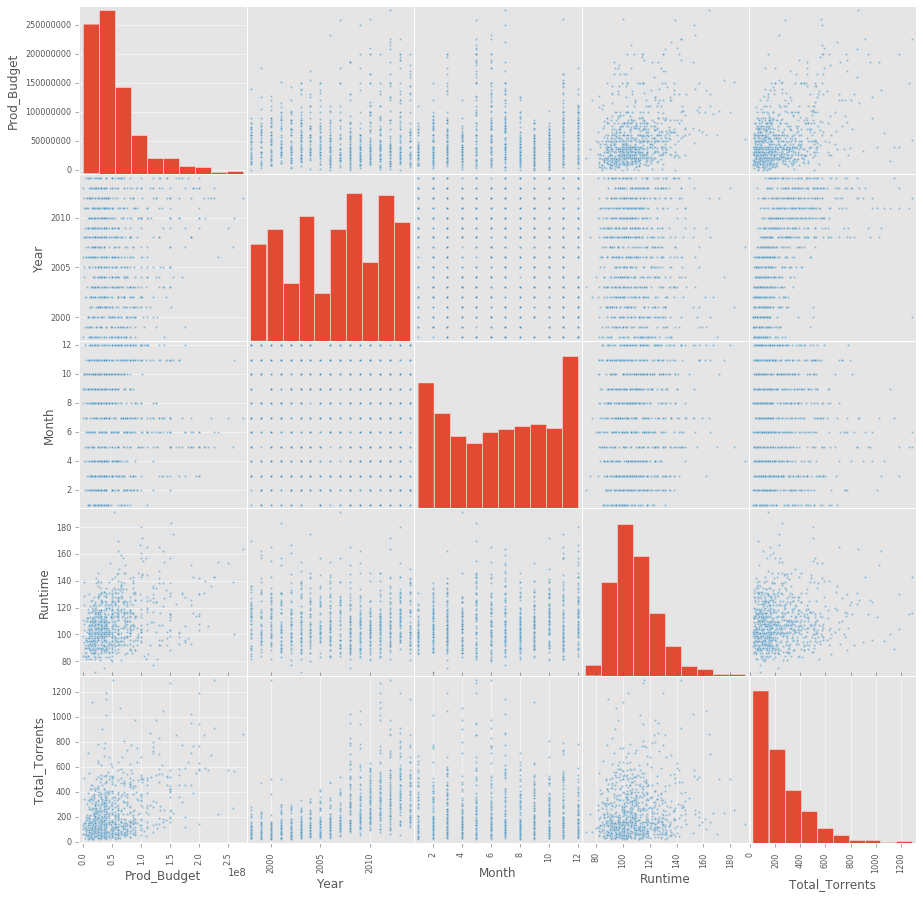

In [15]:
# entire dataframe
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_sub)

In [16]:
from patsy import dmatrices
patsy_formula = 'Total_Torrents ~ Prod_Budget + Year + Month + Runtime + Genre_Single'
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

In [17]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     114.6
Date:                Thu, 14 Jul 2016   Prob (F-statistic):          2.89e-130
Time:                        21:41:15   Log-Likelihood:                -5610.6
No. Observations:                 875   AIC:                         1.124e+04
Df Residuals:                     866   BIC:                         1.128e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                 -4.519e+04   2130.904    -21.209      0.000     -4.94e+04  -4.1e+04
Genre_Single[T.Adventure]  -130.7647     34.044     -3.841      0.000      -197.582   -63.947
Genre_Single[T.Comedy]     -126.4385     14.823     -8.530      0.000      -155.532   -97.345
Genre_Single[T.Crime]      -104.6921     39.253     -2.667      0.008      -181.734   -27.650
Genre_Single[T.Drama]       -85.7248     15.962     -5.370      0.000      -117.054   -54.395
Prod_Budget                1.579e-06   1.32e-07     11.941      0.000      1.32e-06  1.84e-06
Year                         22.6544      1.060     21.364      0.000        20.573    24.736
Month                        -2.3964      1.505     -1.592      0.112        -5.351     0.558
Runtime                       0.0388      0.344      0.113      0.910        -0.637     0.715
==============================================================================
Omnibus:                      459.727   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4702.530
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                      13.494   Cond. No.                     3.01e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
mod_lr_score = model.score(x, y)
mod_lr_coef = model.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [19]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
cv_mod_score = model.score(x_train, y_train)

In [20]:
# reset x, y otherwise errors occur
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
cvKf_mod_score = clf2.score(x,y)

In [21]:
#NORMAL RESULTS
print('Model Linear Regression Score = {0}'.format(mod_lr_score))
print('            Mean Square Error = {0}'.format(mean_sq_err))
print(' Cross Validation Model Score = {0}'.format(cv_mod_score))
print('     Mean Squred Error K-Fold = {0}'.format(mean_sq_errKf))
print('Cross Val. K-Fold Model Score = {0}'.format(cvKf_mod_score))

Model Linear Regression Score = 0.5143249650285255
            Mean Square Error = 23547.25839630739
 Cross Validation Model Score = 0.49519477086372576
     Mean Squred Error K-Fold = 19837.932435884097
Cross Val. K-Fold Model Score = 0.5134223089881081


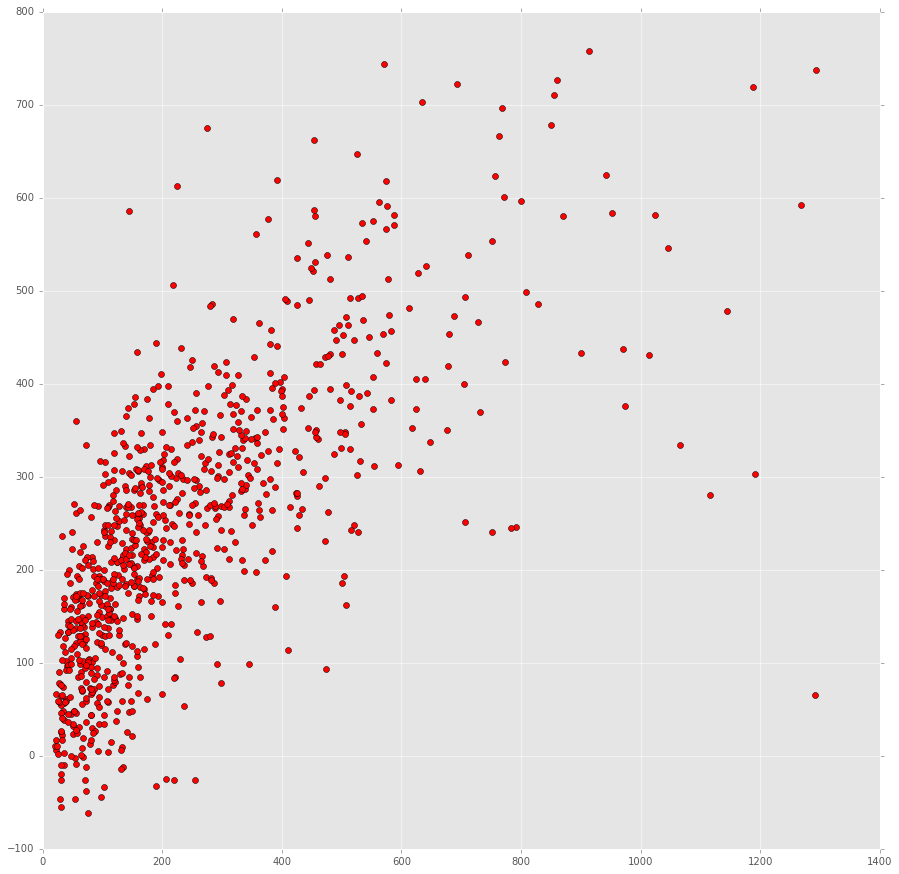

In [22]:
_ = plt.plot(y, model.predict(x), 'ro')

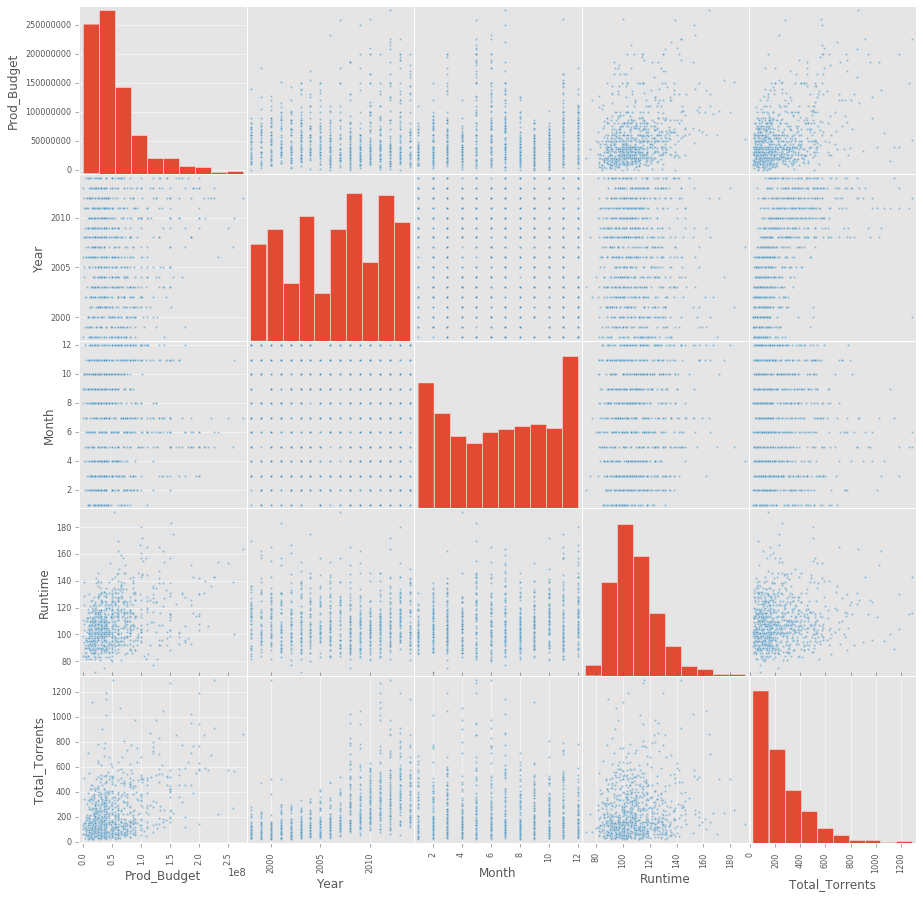

In [23]:
# entire dataframe
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_sub)

---
# Log Transform

In [24]:
df.columns

Index(['Title', 'Prod_Budget', 'Released', 'Year', 'Month', 'Rated', 'Runtime',
       'Genre', 'Director', 'Actors', 'Total_Torrents'],
      dtype='object')

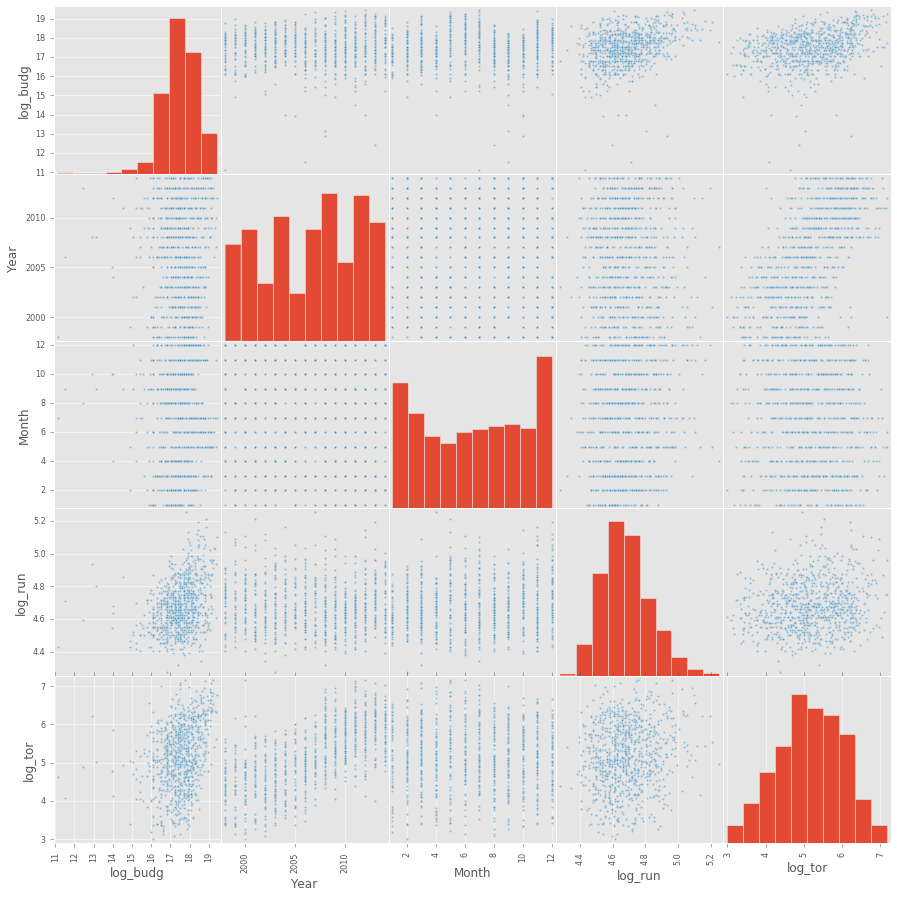

In [25]:
df_sub['log_budg']=np.log(df_sub.Prod_Budget)
#df_sub['log_year']=np.log(df_sub.Year)
df_sub['log_run']=np.log(df_sub.Runtime)
df_sub['log_tor']=np.log(df_sub.Total_Torrents)

trans = df_sub[['log_budg', 'Year', 'Month', 'log_run', 'log_tor']]
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(trans)

In [26]:
log_patsy_formula = 'log_tor ~ log_budg + Year + Month + log_run + Genre_Single'
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

In [27]:
import statsmodels.formula.api as smf
results = smf.ols(formula=log_patsy_formula, data=df_sub,).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tor   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     145.6
Date:                Thu, 14 Jul 2016   Prob (F-statistic):          1.28e-154
Time:                        21:41:21   Log-Likelihood:                -731.03
No. Observations:                 875   AIC:                             1480.
Df Residuals:                     866   BIC:                             1523.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                  -225.6986      8.059    -28.005      0.000      -241.516  -209.881
Genre_Single[T.Adventure]    -0.3322      0.128     -2.593      0.010        -0.584    -0.081
Genre_Single[T.Comedy]       -0.5808      0.055    -10.468      0.000        -0.690    -0.472
Genre_Single[T.Crime]        -0.4637      0.148     -3.127      0.002        -0.755    -0.173
Genre_Single[T.Drama]        -0.3320      0.059     -5.608      0.000        -0.448    -0.216
log_budg                      0.2054      0.023      8.950      0.000         0.160     0.250
Year                          0.1131      0.004     28.345      0.000         0.105     0.121
Month                        -0.0009      0.006     -0.161      0.872        -0.012     0.010
log_run                       0.1487      0.147      1.014      0.311        -0.139     0.437
==============================================================================
Omnibus:                       26.508   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.754
Skew:                           0.223   Prob(JB):                     1.16e-10
Kurtosis:                       4.028   Cond. No.                     8.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# store results
log_mod_lr_score = model.score(x,y)

In [29]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
log_mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cv_mod_score = model.score(x_train, y_train)

In [30]:
# reset x, y otherwise errors occur
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
log_mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cvKf_mod_score = clf2.score(x,y)

In [31]:
#LOG RESULTS
print('Log Model Linear Regression Score = {0}'.format(log_mod_lr_score))
print('            Log Mean Square Error = {0}'.format(log_mean_sq_err))
print(' Log Cross Validation Model Score = {0}'.format(log_cv_mod_score))
print('     Log Mean Squred Error K-Fold = {0}'.format(log_mean_sq_errKf))
print('Log Cross Val. K-Fold Model Score = {0}'.format(log_cvKf_mod_score))

Log Model Linear Regression Score = 0.5736465944453593
            Log Mean Square Error = 0.3153497661808947
 Log Cross Validation Model Score = 0.5619026736924717
     Log Mean Squred Error K-Fold = 0.31894305964685016
Log Cross Val. K-Fold Model Score = 0.5733529230447881


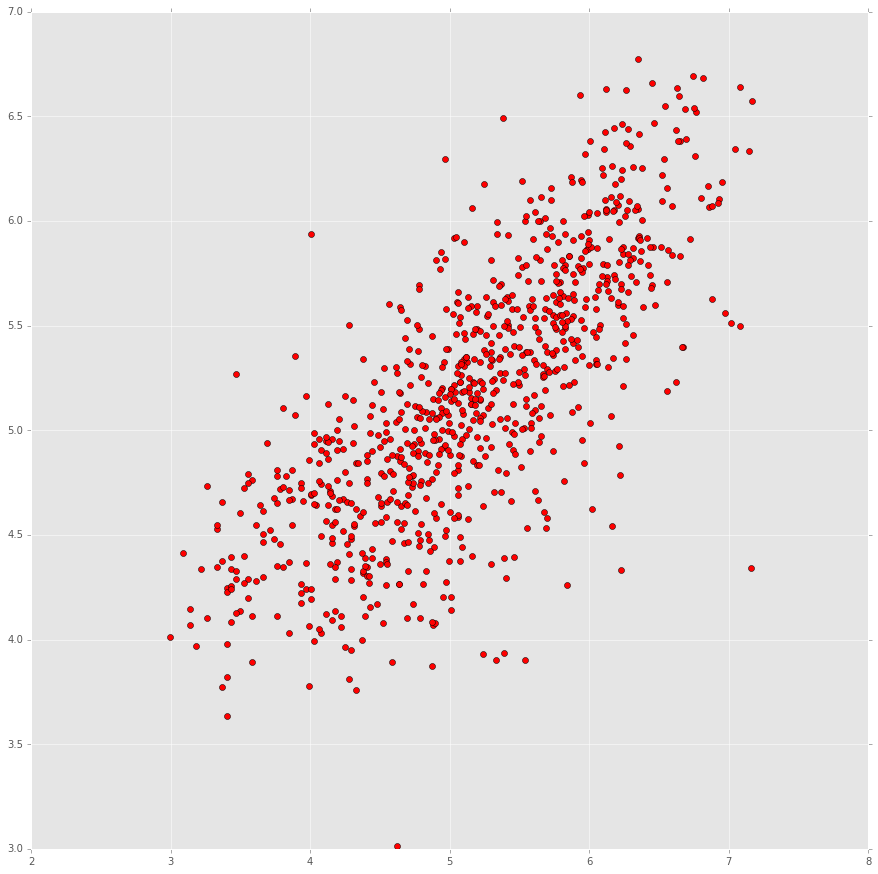

In [32]:
_ = plt.plot(y, model.predict(x), 'ro')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



In [ ]:
plt.figure(figsize=(25,10))

ind = np.arange(len(yr_dict))
width = 0.35

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')
plt.xticks(ind + width/2., (bar_year), rotation='vertical')
plt.yticks(np.arange(0, 91, 5))

plt.show()